In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [ ]:
df= pd.read_csv('loan-train.csv')
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [ ]:
df.shape

(614, 13)

# Exploring the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# find the type of the variables
df.dtypes    

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

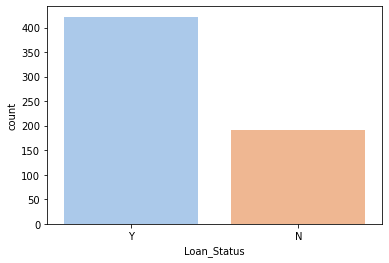

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='Loan_Status', data=df, palette='pastel')
plt.show()
plt.savefig('count plot')

<AxesSubplot:>

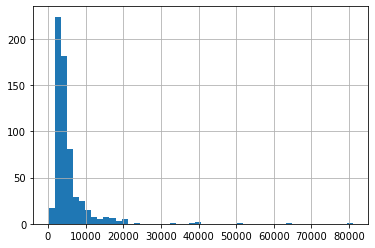

In [ ]:
df['ApplicantIncome'].hist(bins=50)       # not a normal distribution

<AxesSubplot:>

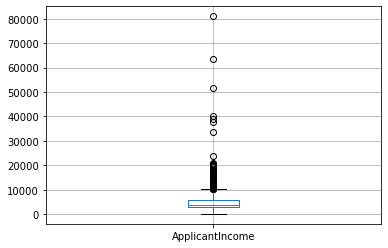

In [ ]:
df.boxplot(column='ApplicantIncome')     # we can see the outliers

<AxesSubplot:>

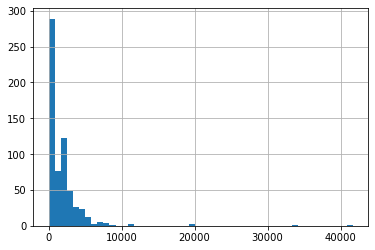

In [ ]:
df['CoapplicantIncome'].hist(bins=50)

<AxesSubplot:>

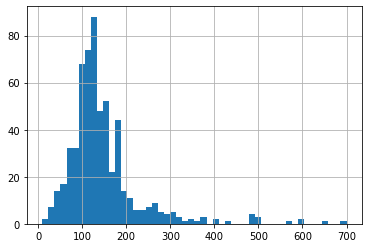

In [ ]:
df['LoanAmount'].hist(bins=50)    # outlier +no normal distribution

<AxesSubplot:>

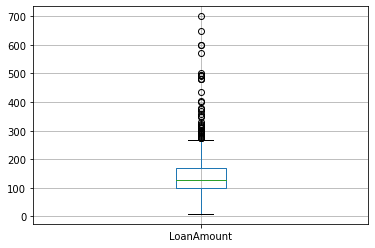

In [ ]:
df.boxplot(column='LoanAmount')

# Normalize the LoanAmount, ApplicantIncome

When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or removes the skewness of our original data.

For some reason, I could not use log() for the CoapplicantIncome column. It gives me an error. So I decided to not use this column. 

*****Another way is adding 'ApplicantIncome' and 'CoapplicantIncome', and adding a new column of 'totalIncome' to the dataset, and getting the log of this variable.


In [ ]:
# log() 
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])    
df['LoanAmount_log']=np.log(df['LoanAmount'])

In [ ]:
#df['CoapplicantIncome_log']=np.log(df['CoapplicantIncome'])

<AxesSubplot:>

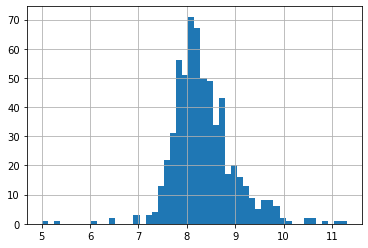

In [ ]:
df['ApplicantIncome_log'].hist(bins=50) 

<AxesSubplot:>

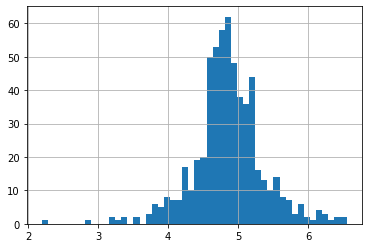

In [ ]:
df['LoanAmount_log'].hist(bins=50) 

# Checking Nulls

In [1]:
df.isnull().values.any()

NameError: ignored

In [ ]:
df.isnull().values.sum()

In [ ]:
df.isnull().sum()

**--> One way to deal with the null values is to replace them with mode/mean values. So, for the categorical variables, we use the mode value of each column, and for the numerical variables, we use the mean value of each column.**

In [ ]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','ApplicantIncome_log','LoanAmount_log','CoapplicantIncome_log']

In [ ]:
# in Categorical variables, replace the nulls with mode value
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

# in Nnumeric variables, replcase nulls with mean values of each variable
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['LoanAmount_log']=df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean())

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
# Second way to deal with Nulls

#we cann remove the rows that have null values:
#df=df.dropna(how='any',axis=0)
#df.isnull().values.sum()
#df.shape
#(480,16)

# Split the data into x, y

In [ ]:
# Assigning numerical values and storing in another column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Married'] = labelencoder.fit_transform(df['Married'])
df['Dependents'] = labelencoder.fit_transform(df['Dependents'])
df['Education'] = labelencoder.fit_transform(df['Education'])
df['Self_Employed'] = labelencoder.fit_transform(df['Self_Employed'])
df['Loan_Amount_Term'] = labelencoder.fit_transform(df['Loan_Amount_Term'])
df['Credit_History'] = labelencoder.fit_transform(df['Credit_History'])
df['Property_Area'] = labelencoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = labelencoder.fit_transform(df['Loan_Status'])

df.head(2)

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162                 8   
1             4583             1508.0  128.000000                 8   

   Credit_History  Property_Area  Loan_Status  ApplicantIncome_log  \
0               1              2            1             8.674026   
1               1              0            0             8.430109   

   LoanAmount_log  
0        4.857444  
1        4.852030

In [ ]:
#Split our data into two sets:
 #Training set (70-80%) used to discover potentially predictive relationships, and
 #Test set (20-30%) used to evaluate whether the discovered relationships hold and to assess the strength and utility of a predictive relationship.

In [ ]:
from sklearn .model_selection import train_test_split
X=df[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','ApplicantIncome_log','LoanAmount_log']] 
y=df[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((491, 10), (123, 10))

In [ ]:
X_train.head(2)

Gender  Married  Dependents  Education  Self_Employed  Loan_Amount_Term  \
90        1        1           0          0              0                 8   
533       1        0           1          0              0                 8   

     Credit_History  Property_Area  ApplicantIncome_log  LoanAmount_log  
90                1              1             7.992269        4.875197  
533               1              1             9.328123        5.278115

## Feature scaling

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [ ]:
# I use Gaussian!

from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X_train,np.ravel(y_train))   #np.ravel() --> to remove the error, we can remove it. Get the same results.

GaussianNB()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn import metrics
confusion_Matrix_Naive = metrics.confusion_matrix(y_test, y_pred) 
print(confusion_Matrix_Naive)
print(metrics.accuracy_score(y_pred,y_test))

[[14 19]
 [ 2 88]]
0.8292682926829268


# Import Test Data

In [ ]:
df_test= pd.read_csv('loan-test.csv')
df_test.head(2)

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001015   Male     Yes          0  Graduate            No   
1  LP001022   Male     Yes          1  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban

# Normalize

In [ ]:
df_test['ApplicantIncome_log']=np.log(df_test['ApplicantIncome'])

In [ ]:
df_test['LoanAmount_log']=np.log(df_test['LoanAmount'])

In [ ]:
#check the nulls
df_test.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
ApplicantIncome_log    0
LoanAmount_log         0
dtype: int64

In [ ]:
# Replace the Nulls with mode/mean
#in Categorical variables, replace the nulls with mode value
for col in categorical_columns:
    df_test[col].fillna(df_test[col].mode()[0],inplace=True)
    
#replace the nulls with mean
df_test['LoanAmount']=df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())
df_test['LoanAmount_log']=df_test['LoanAmount_log'].fillna(df_test['LoanAmount_log'].mean())

In [ ]:
df_test.isnull().values.sum()

0

In [ ]:
#Converting Categorical(text) variables to numeric format

labelencoder = LabelEncoder()
df_test['Gender'] = labelencoder.fit_transform(df_test['Gender'])
df_test['Married'] = labelencoder.fit_transform(df_test['Married'])
df_test['Dependents'] = labelencoder.fit_transform(df_test['Dependents'])
df_test['Education'] = labelencoder.fit_transform(df_test['Education'])
df_test['Self_Employed'] = labelencoder.fit_transform(df_test['Self_Employed'])
df_test['Loan_Amount_Term'] = labelencoder.fit_transform(df_test['Loan_Amount_Term'])
df_test['Credit_History'] = labelencoder.fit_transform(df_test['Credit_History'])
df_test['Property_Area'] = labelencoder.fit_transform(df_test['Property_Area'])

df_test.head(2)

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001015       1        1           0          0              0   
1  LP001022       1        1           1          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0                10   
1             3076               1500       126.0                10   

   Credit_History  Property_Area  ApplicantIncome_log  LoanAmount_log  
0               1              2             8.651724        4.700480  
1               1              2             8.031385        4.836282

In [ ]:
#selecting the variables: all columns except: ApplicantIncome,CoapplicantIncome,LoanAmount. 
#CoapplicantIncome --> I cannot get log() on this column, it gives error
#ApplicantIncome, LoanAmount --> we use the log ones: ApplicantIncome_log,LoanAmount_log

test=df_test[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','ApplicantIncome_log','LoanAmount_log']] 
test.shape

(367, 10)

In [ ]:
ss=StandardScaler()
test=ss.fit_transform(X_train)

In [ ]:
prediction=model.predict(test)
prediction

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

***********************************************************************************************************

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tree = clf.predict(X_test)

In [ ]:
#Evaluating model

Confusion_matrix_Tree = metrics.confusion_matrix(y_test, y_pred_tree) 
print(Confusion_matrix_Tree)
accuracy = metrics.accuracy_score(y_test, y_pred_tree) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred_tree) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred_tree) 
print("Recall score:",recall)

[[14 19]
 [27 63]]
Accuracy score: 0.6260162601626016
Precision score: 0.7682926829268293
Recall score: 0.7


# Deacision Tree-Visualize

In [ ]:
#!pip install graphviz
#!pip install pydotplus

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree

fn=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','ApplicantIncome_log','LoanAmount_log']
cn=['Loan_Statues']


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,50), dpi=300,)
sub1=tree.plot_tree(clf, fontsize=14, feature_names=fn); #class_names=cn

-------------------------------------------------------------------------------------------------------------------

# Logistic Regression

Since "Loan_Status" is a binary variable we need to use **logit model**.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model = sm.Logit(y_train, X_train).fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.474937
         Iterations 6
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.246     
Dependent Variable:   Loan_Status      AIC:              486.3878  
Date:                 2021-11-16 18:12 BIC:              528.3523  
No. Observations:     491              Log-Likelihood:   -233.19   
Df Model:             9                LL-Null:          -309.19   
Df Residuals:         481              LLR p-value:      3.3978e-28
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Gender              -0.1210   0.3198 -0.3785 0.7051 -0.7478  0.5057
Married              0.4058   0.2714  1.4

In [ ]:
logit_model.pvalues < 0.05

Gender                 False
Married                False
Dependents             False
Education              False
Self_Employed          False
Loan_Amount_Term       False
Credit_History          True
Property_Area          False
ApplicantIncome_log    False
LoanAmount_log          True
dtype: bool

In [ ]:
y_pred_regression = logit_model.predict(X_test)
y_pred_regression

454    0.801840
52     0.768554
536    0.721765
469    0.829726
55     0.858607
         ...   
337    0.808489
376    0.856048
278    0.682570
466    0.133826
303    0.847169
Length: 123, dtype: float64

In [ ]:
from sklearn import metrics
confusion_Matrix_Naive = metrics.confusion_matrix(y_test, y_pred) 
print(confusion_Matrix_Naive)
print(metrics.accuracy_score(y_pred,y_test))

[[14 19]
 [ 2 88]]
0.8292682926829268


In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_regression.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)
        
#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

Confusion Matrix: 
 [[14  2]
 [19 88]] 

Accuracy: 0.8292682926829268 

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

